Processed and saved images for Markers_Counter Window - PMA_2h_DFO-Zeitkinetik_4.jpg


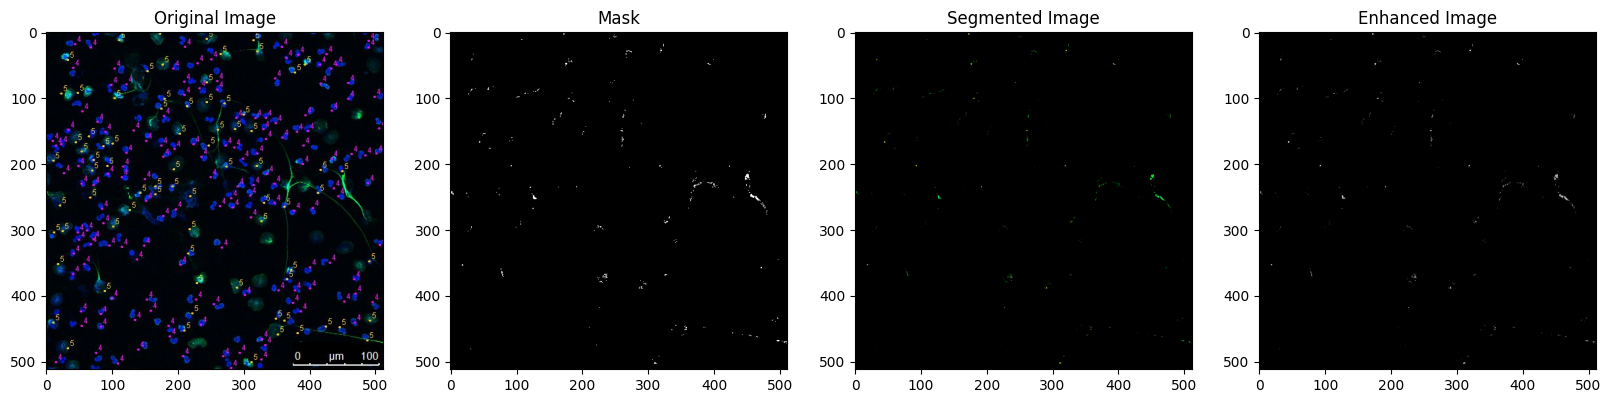

Processed and saved images for Markers_Counter Window - PMA_2h_DFO-Zeitkinetik_5.jpg


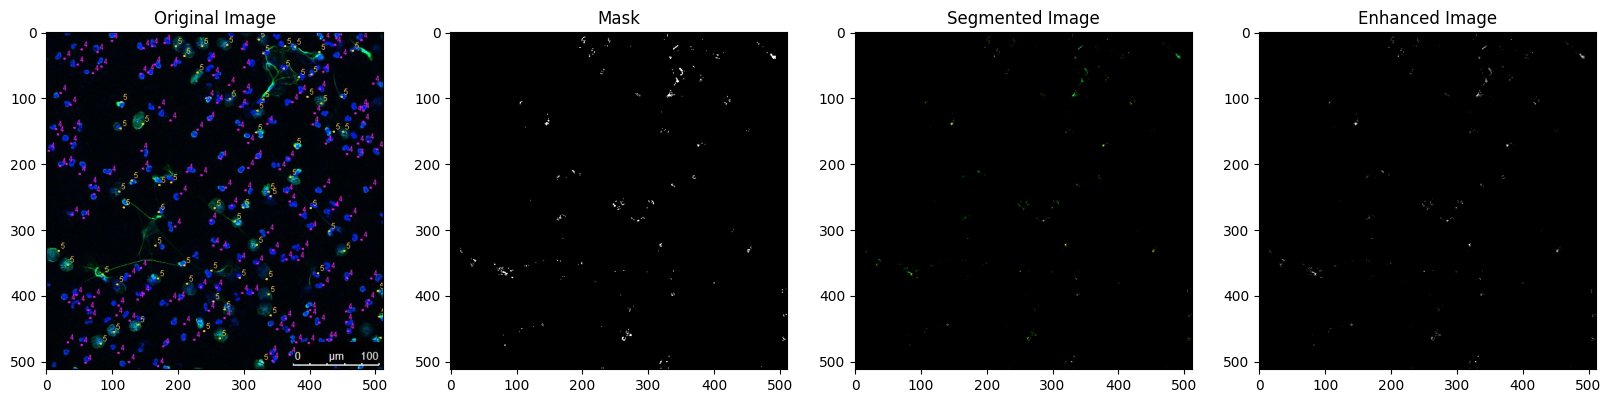

Processed and saved images for Markers_Counter Window - Counter Window - DFO_3h_DFO-Zeitkinetik_6.jpg


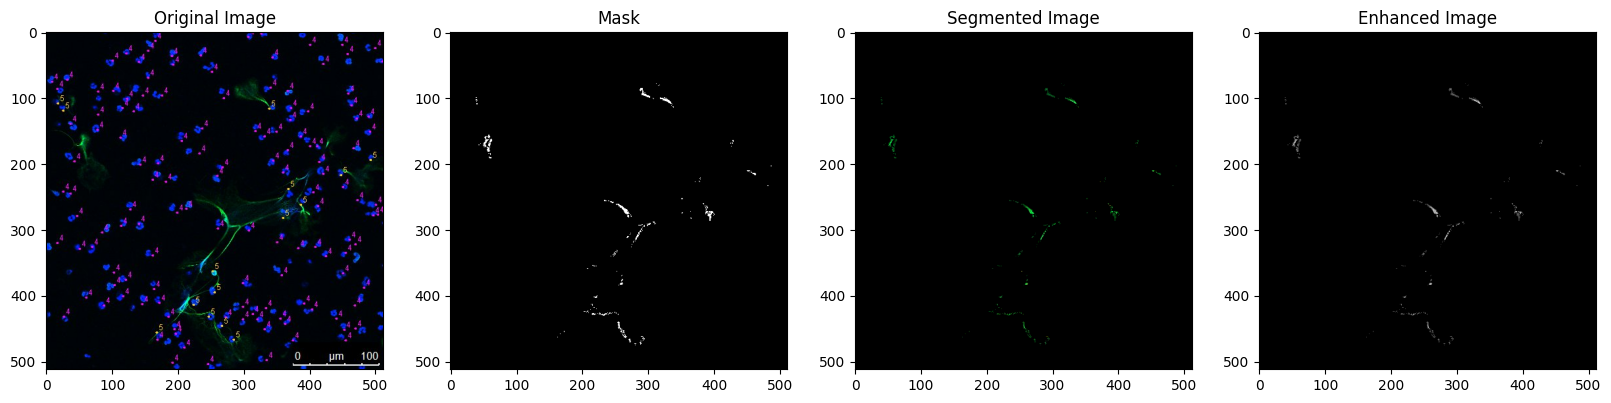

Processed and saved images for Markers_Counter Window - PMA_3h_DFO-Zeitkinetik_5.jpg


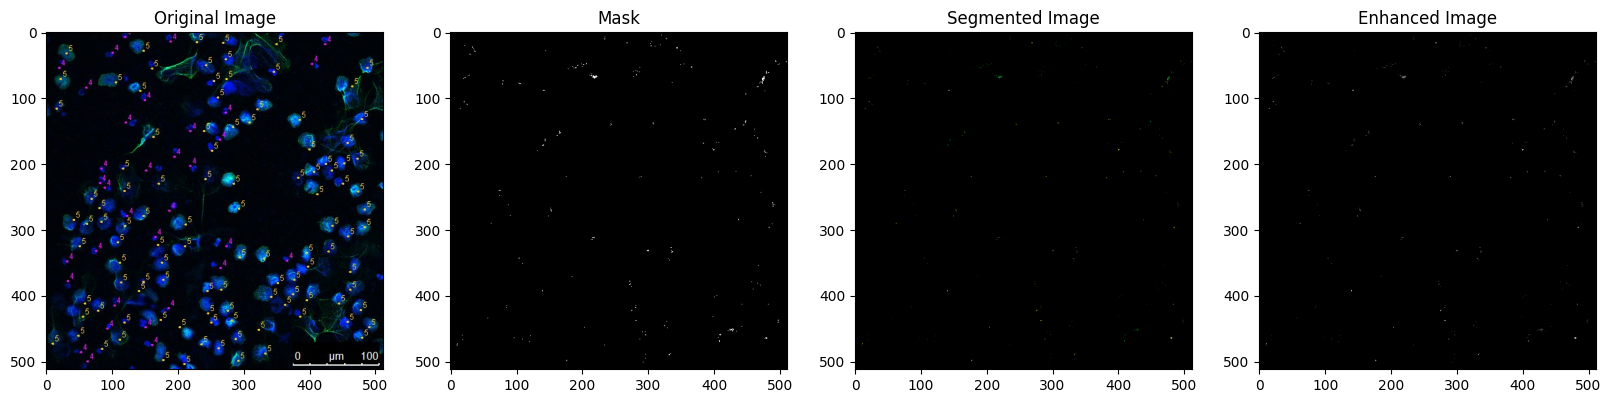

Processed and saved images for Markers_Counter Window - DFO_3h_DFO-Zeitkinetik_5.jpg


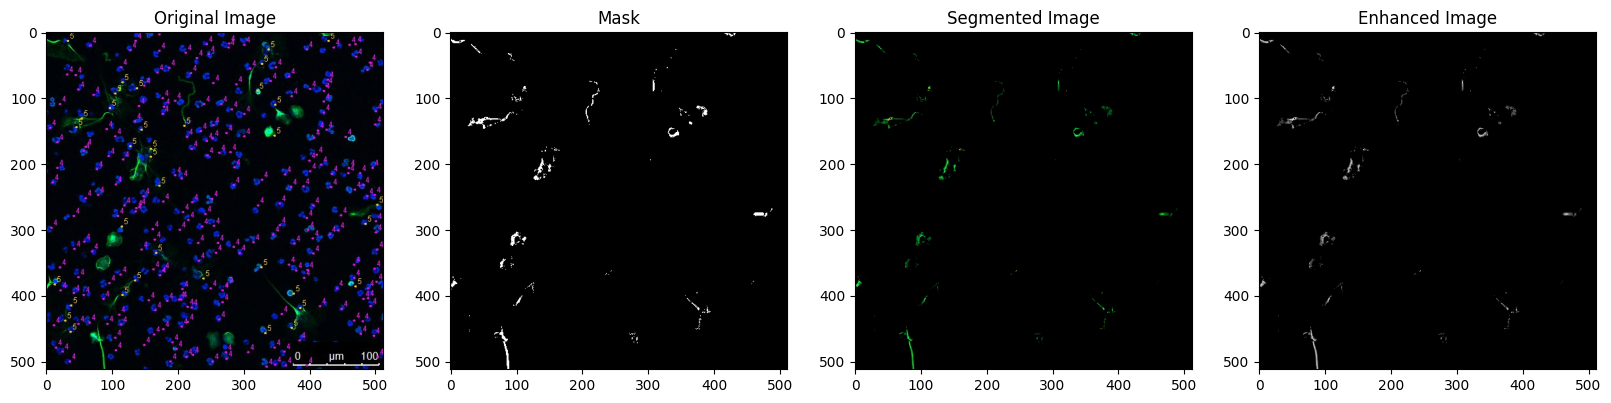

Processed and saved images for Markers_Counter Window - Ctr._2h_DFO-Zeitkinetik_4.jpg


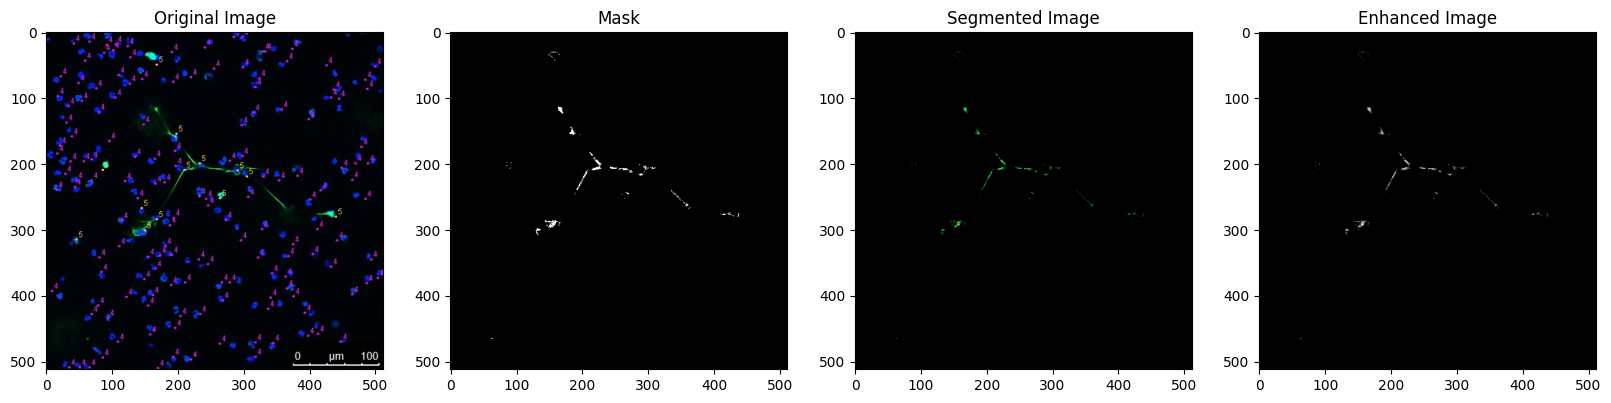

Processed and saved images for Markers_Counter Window - DFO_2h_DFO-Zeitkinetik_6.jpg


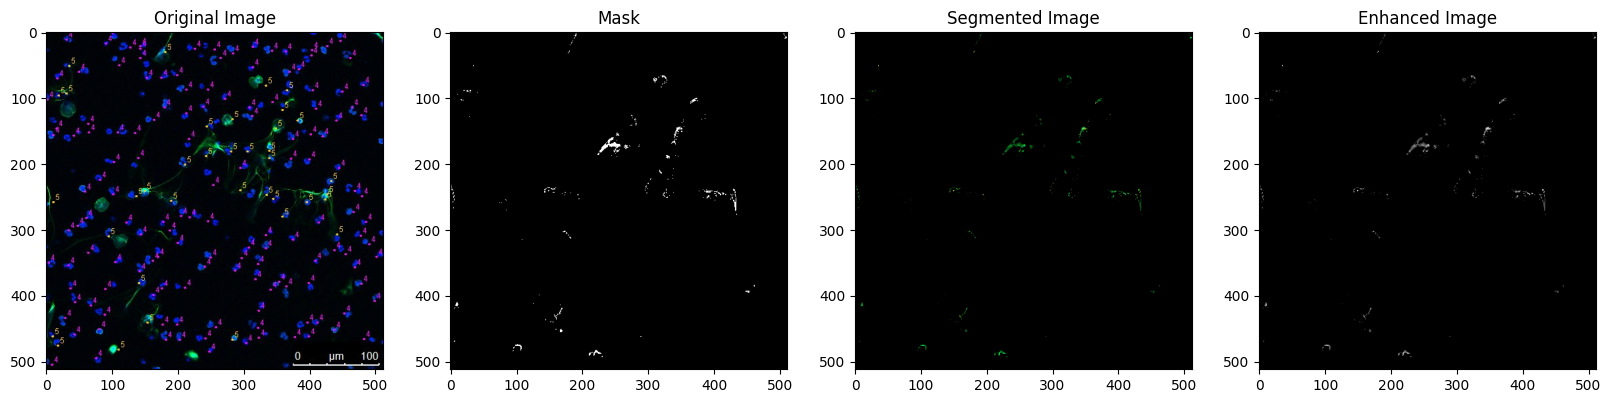

Processed and saved images for Markers_Counter Window - DFO+PMA_4h_DFO-Zeitkinetik_6.jpg


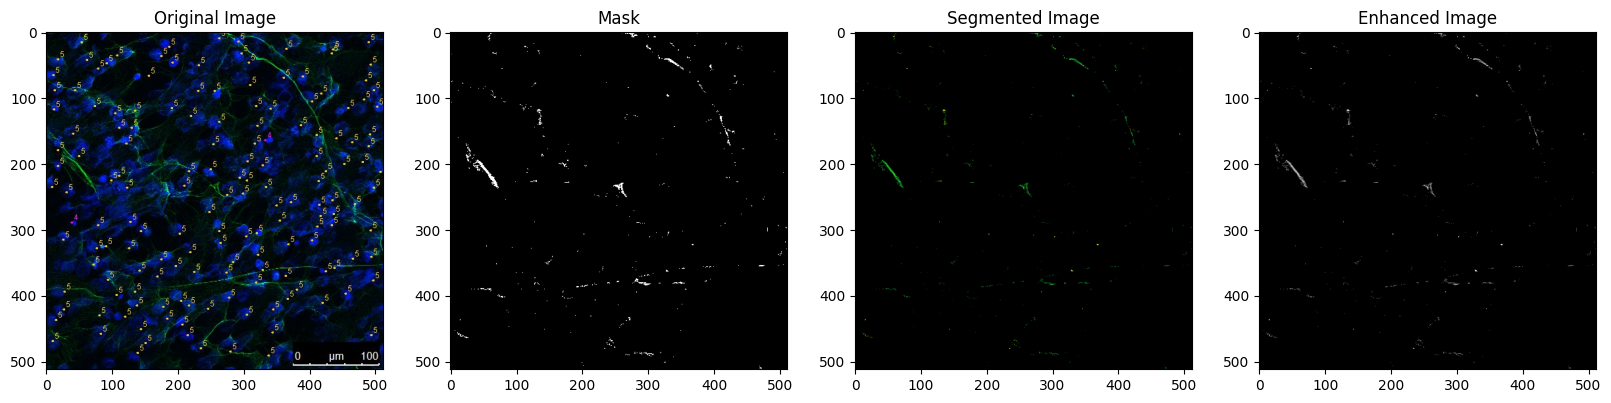

Processed and saved images for Markers_Counter Window - Ctr._1h_DFO-Zeitkinetik_2.jpg


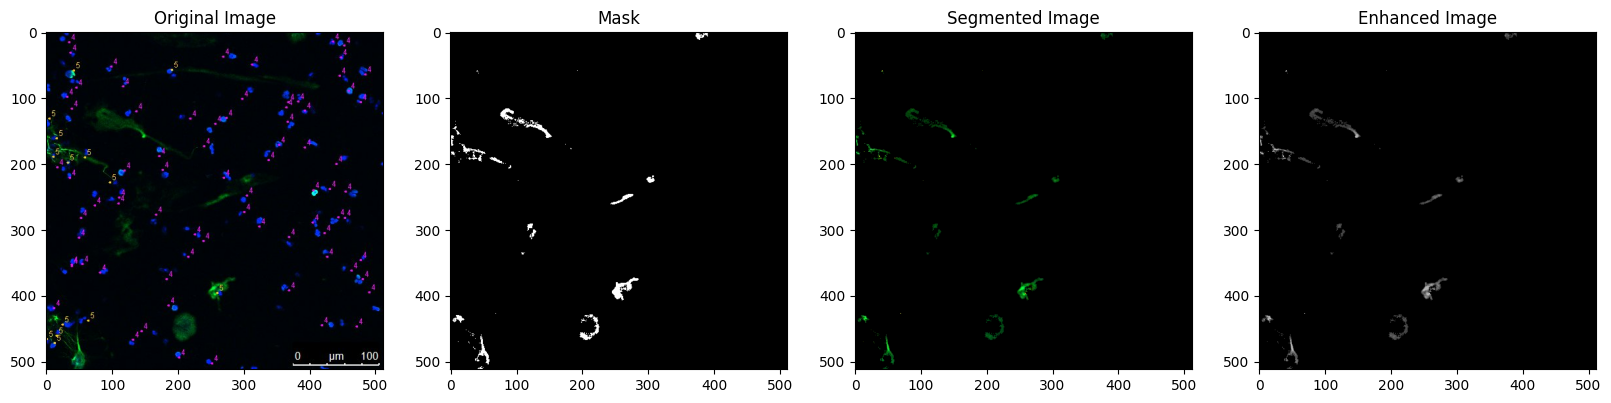

Processed and saved images for Markers_Counter Window - DFO_2h_DFO-Zeitkinetik_2.jpg


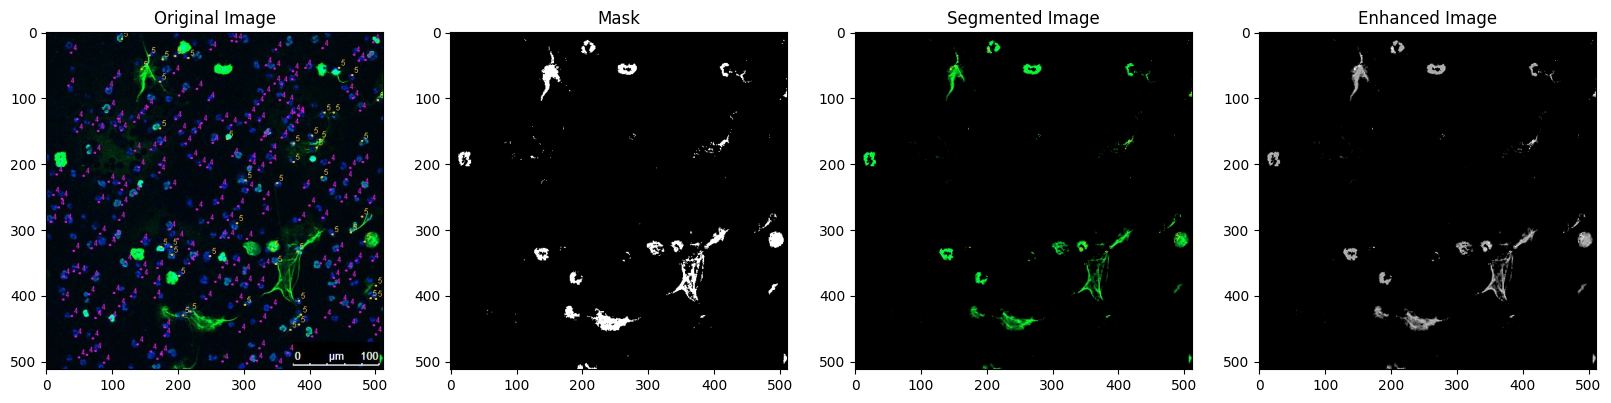

In [63]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Directories
input_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/labelled_input'
output_segmented_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/segmented'
output_enhanced_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/enhanced'

def segment_and_enhance_nets(image):
    if image is None:
        raise ValueError("Image not loaded properly. Please check the file path and try again.")
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_color = np.array([30, 150, 50])  # Adjust these values based on your color range
    upper_color = np.array([70, 255, 255])
    mask = cv2.inRange(hsv, lower_color, upper_color)
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    enhanced_shape = cv2.convertScaleAbs(segmented_image, alpha=1.5, beta=0)
    return segmented_image, enhanced_shape, mask

def process_images(input_dir, output_segmented_dir, output_enhanced_dir):
    os.makedirs(output_segmented_dir, exist_ok=True)
    os.makedirs(output_enhanced_dir, exist_ok=True)
    
    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)
            
            if image is None:
                print(f"Failed to load image at {image_path}")
                continue
            
            segmented_image, enhanced_shape, mask = segment_and_enhance_nets(image)

            # Convert enhanced shape image to grayscale
            enhanced_shape_gray = cv2.cvtColor(enhanced_shape, cv2.COLOR_BGR2GRAY)
            enhanced_shape_gray = np.expand_dims(enhanced_shape_gray, axis=-1)

            segmented_image_path = os.path.join(output_segmented_dir, filename)
            enhanced_image_path = os.path.join(output_enhanced_dir, filename)
            
            cv2.imwrite(segmented_image_path, segmented_image)
            cv2.imwrite(enhanced_image_path, enhanced_shape_gray)
            
            print(f"Processed and saved images for {filename}")
            
            # Visualization
            plt.figure(figsize=(20, 5))
            plt.subplot(1, 4, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.subplot(1, 4, 2)
            plt.imshow(mask, cmap='gray')
            plt.title('Mask')
            plt.subplot(1, 4, 3)
            plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
            plt.title('Segmented Image')
            plt.subplot(1, 4, 4)
            plt.imshow(enhanced_shape_gray.squeeze(), cmap='gray')
            plt.title('Enhanced Image')
            plt.show()

# Process images
process_images(input_directory, output_segmented_directory, output_enhanced_directory)


In [89]:
# Example usage of the CustomDataGenerator
image_filenames = [f for f in os.listdir(input_directory) if f.endswith(".jpg") or f.endswith(".png")]
labels_dict = {filename: 4 if "NET" in filename else 5 for filename in image_filenames}

batch_size = 2
train_gen = CustomDataGenerator(image_filenames, labels_dict, batch_size, input_directory, output_enhanced_directory)
val_gen = CustomDataGenerator(image_filenames, labels_dict, batch_size, input_directory, output_enhanced_directory)


In [90]:
# Train the model
try:
    history = model.fit(
        train_gen,
        epochs=1,  # Use 1 epoch for initial debugging
        steps_per_epoch=len(train_gen),  # Ensure steps per epoch matches data generator length
        validation_data=val_gen,
        validation_steps=len(val_gen)  # Ensure validation steps matches validation generator length
    )
except Exception as e:
    print(f"Error during model fitting: {e}")

# Save the model
model.save('NET_counting_model_combined.h5')


Batch 0 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 3 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 0 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
5/5 [==============================] - ETA: 0s - loss: 18.6275Batch 0 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 0 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 1 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 2 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 3 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 4 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
5/5 [==============================] - 5s 475ms/step - loss: 18.6275 - val_loss: 8.4471


In [91]:
def predict_and_print_counts(model, input_dir_color, input_dir_shape):
    predict_gen = CustomDataGenerator(image_filenames, labels_dict, batch_size=1, image_dir=input_dir_color, enhanced_dir=input_dir_shape, shuffle=False)
    
    predictions = model.predict(predict_gen, steps=len(predict_gen))
    
    for filename, prediction in zip(predict_gen.image_filenames, predictions):
        print(f"Image: {filename}, Predicted Count: {prediction[0]}")

# Predict and print counts
predict_and_print_counts(model, input_directory, output_enhanced_directory)


Batch 0 - X color shape: (1, 224, 224, 3), X shape shape: (1, 224, 224, 1), y shape: (1,)
Batch 0 - X color shape: (1, 224, 224, 3), X shape shape: (1, 224, 224, 1), y shape: (1,)
Batch 1 - X color shape: (1, 224, 224, 3), X shape shape: (1, 224, 224, 1), y shape: (1,)
 1/10 [==>...........................] - ETA: 1sBatch 2 - X color shape: (1, 224, 224, 3), X shape shape: (1, 224, 224, 1), y shape: (1,)
Batch 3 - X color shape: (1, 224, 224, 3), X shape shape: (1, 224, 224, 1), y shape: (1,)
 4/10 [===========>..................] - ETA: 0sBatch 5 - X color shape: (1, 224, 224, 3), X shape shape: (1, 224, 224, 1), y shape: (1,)
Batch 6 - X color shape: (1, 224, 224, 3), X shape shape: (1, 224, 224, 1), y shape: (1,)
 6/10 [=================>............] - ETA: 0sBatch 7 - X color shape: (1, 224, 224, 3), X shape shape: (1, 224, 224, 1), y shape: (1,)
Batch 8 - X color shape: (1, 224, 224, 3), X shape shape: (1, 224, 224, 1), y shape: (1,)
10/10 [==============================] - 1s 43

In [92]:
for i in range(len(train_gen)):
    X, y = train_gen[i]
    print(f"Batch {i} - X color shape: {X[0].shape}, X shape shape: {X[1].shape}, y shape: {y.shape}")


Batch 0 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 0 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 1 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 1 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 2 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 2 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 3 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 3 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 4 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)
Batch 4 - X color shape: (2, 224, 224, 3), X shape shape: (2, 224, 224, 1), y shape: (2,)


In [2]:
import matplotlib.pyplot as plt
import cv2
import os

def predict_and_print_counts(model, input_dir_color, input_dir_shape):
    predict_gen = CustomDataGenerator(image_filenames, labels_dict, batch_size=1, image_dir=input_dir_color, enhanced_dir=input_dir_shape, shuffle=False)
    
    predictions = model.predict(predict_gen, steps=len(predict_gen))
    
    for filename, prediction in zip(predict_gen.image_filenames, predictions):
        print(f"Image: {filename}, Predicted Count: {prediction[0]}")
        visualize_prediction(input_dir_color, filename, prediction[0])

def visualize_prediction(image_dir, filename, prediction):
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.title(f"Predicted Count: {prediction}")
    plt.axis('off')
    plt.show()

# Predict and print counts with visualization
predict_and_print_counts(model, input_directory, output_enhanced_directory)


NameError: name 'model' is not defined

In [101]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Directories
input_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/labelled_input'
output_segmented_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/segmented'
output_enhanced_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/enhanced'

def segment_and_enhance_nets(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_color = np.array([30, 150, 50])
    upper_color = np.array([70, 255, 255])
    mask = cv2.inRange(hsv, lower_color, upper_color)
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    enhanced_shape = cv2.convertScaleAbs(segmented_image, alpha=1.5, beta=0)
    return segmented_image, enhanced_shape

def process_images(input_dir, output_segmented_dir, output_enhanced_dir):
    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)
            
            if image is None:
                print(f"Failed to load image at {image_path}")
                continue
            
            segmented_image, enhanced_shape = segment_and_enhance_nets(image)

            # Convert enhanced shape image to grayscale
            enhanced_shape_gray = cv2.cvtColor(enhanced_shape, cv2.COLOR_BGR2GRAY)
            enhanced_shape_gray = np.expand_dims(enhanced_shape_gray, axis=-1)

            segmented_image_path = os.path.join(output_segmented_dir, filename)
            enhanced_image_path = os.path.join(output_enhanced_dir, filename)
            
            cv2.imwrite(segmented_image_path, segmented_image)
            cv2.imwrite(enhanced_image_path, enhanced_shape_gray)
            
            print(f"Processed and saved images for {filename}")

# Process images
process_images(input_directory, output_segmented_directory, output_enhanced_directory)

# ImageDataGenerator for training and validation sets
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generators
train_generator_color = datagen.flow_from_directory(
    output_segmented_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

train_generator_shape = datagen.flow_from_directory(
    output_enhanced_directory,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',  # Ensure grayscale mode
    class_mode='sparse',
    subset='training'
)

# Validation generators
validation_generator_color = datagen.flow_from_directory(
    output_segmented_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

validation_generator_shape = datagen.flow_from_directory(
    output_enhanced_directory,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',  # Ensure grayscale mode
    class_mode='sparse',
    subset='validation'
)

# Function to add a prefix to layer names
def add_prefix_to_model(model, prefix):
    for layer in model.layers:
        layer._name = prefix + layer.name

# Define the combined model
def create_combined_model(input_shape):
    base_model_color = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    color_output = GlobalAveragePooling2D()(base_model_color.output)

    shape_input = Input(shape=(input_shape[0], input_shape[1], 1), name='shape_input')
    base_model_shape = VGG16(include_top=False, weights=None, input_tensor=shape_input)
    add_prefix_to_model(base_model_shape, 'shape_')
    shape_output = GlobalAveragePooling2D()(base_model_shape.output)

    combined = Concatenate()([color_output, shape_output])

    x = Dense(128, activation='relu')(combined)
    predictions = Dense(1, activation='linear')(x)

    model = Model(inputs=[base_model_color.input, shape_input], outputs=predictions)

    for layer in base_model_color.layers:
        layer.trainable = False
    for layer in base_model_shape.layers:
        layer.trainable = False

    return model

model = create_combined_model((224, 224, 3))
model.compile(optimizer='adam', loss='mean_squared_error', run_eagerly=True)

# Combine generators for training and validation
def combine_generators(gen1, gen2):
    while True:
        X1i = gen1.next()
        X2i = gen2.next()
        yield [X1i[0], X2i[0]], X1i[1]

train_generator = combine_generators(train_generator_color, train_generator_shape)
validation_generator = combine_generators(validation_generator_color, validation_generator_shape)

# Print out some samples from the combined generator for debugging
for i in range(3):
    sample = next(train_generator)
    print(f"Sample {i} from train generator: {[x.shape for x in sample[0]]}, {sample[1].shape}")

# Train the model
try:
    history = model.fit(
        train_generator,
        epochs=10,  # Use a smaller number of epochs for initial debugging
        steps_per_epoch=10,  # Adjust steps per epoch as needed
        validation_data=validation_generator,
        validation_steps=10  # Adjust validation steps as needed
    )
except Exception as e:
    print(f"Error during model fitting: {e}")

# Save the model
model.save('NET_counting_model_combined.h5')

# Visualize predictions with markers
def visualize_prediction(image_dir, filename, prediction):
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.title(f"Predicted Count: {prediction}")
    plt.axis('off')
    # Add markers for the predicted structures (mockup for demonstration purposes)
    for i in range(int(round(prediction))):  # Rounding the prediction to the nearest integer
        plt.plot(50 + i*20, 50, 'ro')  # Example marker positions
    plt.show()

def predict_and_print_counts(model, input_dir_color, input_dir_shape):
    predict_gen_color = datagen.flow_from_directory(
        input_dir_color,
        target_size=(224, 224),
        batch_size=1,
        class_mode=None,
        shuffle=False
    )

    predict_gen_shape = datagen.flow_from_directory(
        input_dir_shape,
        target_size=(224, 224),
        batch_size=1,
        color_mode='grayscale',
        class_mode=None,
        shuffle=False
    )

    def combine_generators_for_prediction(gen1, gen2):
        while True:
            X1i = gen1.next()
            X2i = gen2.next()
            yield [X1i, X2i]

    predictions = model.predict(combine_generators_for_prediction(predict_gen_color, predict_gen_shape), steps=len(predict_gen_color))
    
    for filename, prediction in zip(predict_gen_color.filenames, predictions):
        print(f"Image: {filename}, Predicted Count: {prediction[0]}")
        visualize_prediction(input_dir_color, filename, prediction[0])

# Predict and print counts with visualization
predict_and_print_counts(model, output_segmented_directory, output_enhanced_directory)


Processed and saved images for Markers_Counter Window - PMA_2h_DFO-Zeitkinetik_4.jpg
Processed and saved images for Markers_Counter Window - PMA_2h_DFO-Zeitkinetik_5.jpg
Processed and saved images for Markers_Counter Window - Counter Window - DFO_3h_DFO-Zeitkinetik_6.jpg
Processed and saved images for Markers_Counter Window - PMA_3h_DFO-Zeitkinetik_5.jpg
Processed and saved images for Markers_Counter Window - DFO_3h_DFO-Zeitkinetik_5.jpg
Processed and saved images for Markers_Counter Window - Ctr._2h_DFO-Zeitkinetik_4.jpg
Processed and saved images for Markers_Counter Window - DFO_2h_DFO-Zeitkinetik_6.jpg
Processed and saved images for Markers_Counter Window - DFO+PMA_4h_DFO-Zeitkinetik_6.jpg
Processed and saved images for Markers_Counter Window - Ctr._1h_DFO-Zeitkinetik_2.jpg
Processed and saved images for Markers_Counter Window - DFO_2h_DFO-Zeitkinetik_2.jpg
Found 8 images belonging to 1 classes.
Found 8 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
Found 2 im

In [99]:
# Predict and print counts with visualization
predict_and_print_counts(model, output_segmented_directory, output_enhanced_directory)

Found 10 images belonging to 1 classes.
Found 10 images belonging to 1 classes.


ValueError: Layer "model_27" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>]

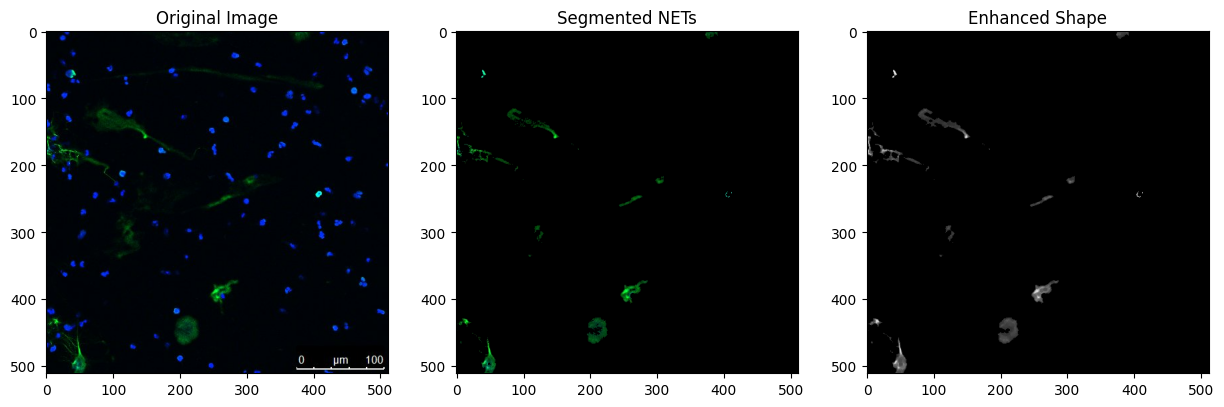

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def segment_and_enhance_nets(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the color range for the fluorescent marker
    lower_color = np.array([30, 150, 50])  # Adjust these values based on the color
    upper_color = np.array([85, 255, 255])
    
    # Create a mask for the color
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    # Apply the mask to get the segmented NETs
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Convert the segmented image to grayscale
    gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    
    # Enhance shapes using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    enhanced = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    
    return segmented_image, enhanced

# Example usage
image_path = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/unlabeled images/jpegs/Ctr._1h_DFO-Zeitkinetik_2.jpg'
image = cv2.imread(image_path)

if image is not None:
    segmented_image, enhanced_shape = segment_and_enhance_nets(image)
    
    # Display the original, segmented, and enhanced images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 2)
    plt.title('Segmented NETs')
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 3)
    plt.title('Enhanced Shape')
    plt.imshow(enhanced_shape, cmap='gray')
    plt.show()
else:
    print(f"Failed to load image from {image_path}")



Files in directory: ['PMA_2h_DFO-Zeitkinetik_5.jpg', 'PMA_2h_DFO-Zeitkinetik_4.jpg', 'PMA_3h_DFO-Zeitkinetik_5.jpg', 'DFO+PMA_4h_DFO-Zeitkinetik_6.jpg', 'DFO_3h_DFO-Zeitkinetik_5.jpg', 'DFO_3h_DFO-Zeitkinetik_6.jpg', 'DFO_2h_DFO-Zeitkinetik_2.jpg', 'Ctr._2h_DFO-Zeitkinetik_4.jpg', 'DFO_2h_DFO-Zeitkinetik_6.jpg', 'Ctr._1h_DFO-Zeitkinetik_2.jpg']
Image path: /Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/unlabeled images/jpegs/Ctr._1h_DFO-Zeitkinetik_2.jpg


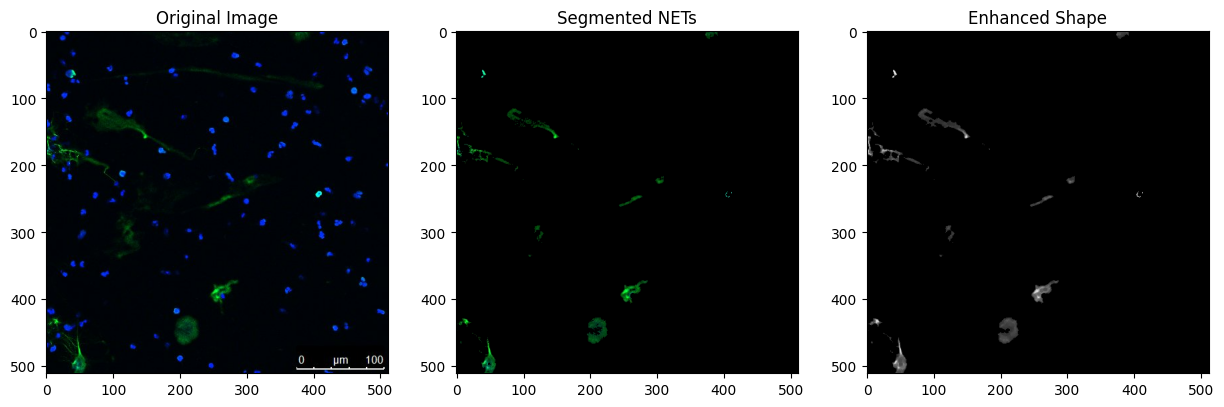

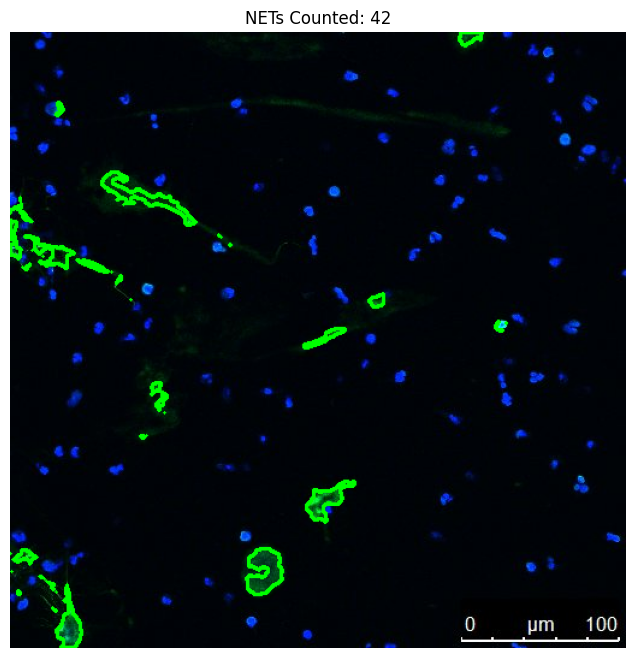

Number of NETs in the image: 42


In [7]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

def segment_and_enhance_nets(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the color range for the fluorescent marker
    lower_color = np.array([30, 150, 50])  # Adjust these values based on the color
    upper_color = np.array([85, 255, 255])
    
    # Create a mask for the color
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    # Apply the mask to get the segmented NETs
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Convert the segmented image to grayscale
    gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    
    # Enhance shapes using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    enhanced = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    
    return segmented_image, enhanced

def count_nets(enhanced_image):
    # Find contours in the enhanced image
    contours, _ = cv2.findContours(enhanced_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Count the number of contours
    num_nets = len(contours)
    
    return num_nets, contours

def process_and_count_nets(image_path):
    image = cv2.imread(image_path)

    if image is not None:
        segmented_image, enhanced_shape = segment_and_enhance_nets(image)
        num_nets, contours = count_nets(enhanced_shape)
        
        # Display the original, segmented, and enhanced images
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 3, 2)
        plt.title('Segmented NETs')
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 3, 3)
        plt.title('Enhanced Shape')
        plt.imshow(enhanced_shape, cmap='gray')
        plt.show()
        
        # Draw contours on the original image
        image_with_contours = image.copy()
        cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
        
        plt.figure(figsize=(8, 8))
        plt.title(f'NETs Counted: {num_nets}')
        plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        print(f"Number of NETs in the image: {num_nets}")
    else:
        print(f"Failed to load image from {image_path}")

# Verify the directory contents
directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/unlabeled images/jpegs'
files = os.listdir(directory)
print("Files in directory:", files)

# Process and count NETs in a specific image
image_path = os.path.join(directory, 'Ctr._1h_DFO-Zeitkinetik_2.jpg')
print("Image path:", image_path)

process_and_count_nets(image_path)


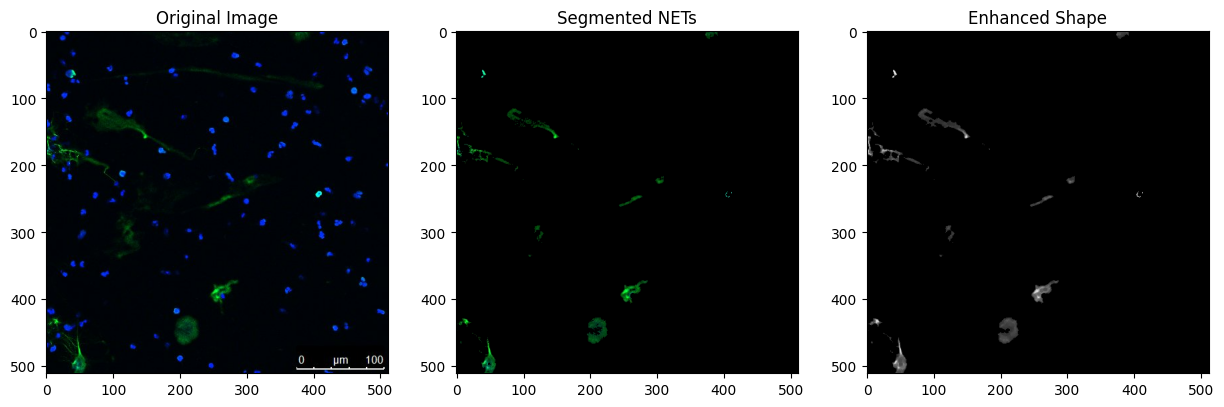

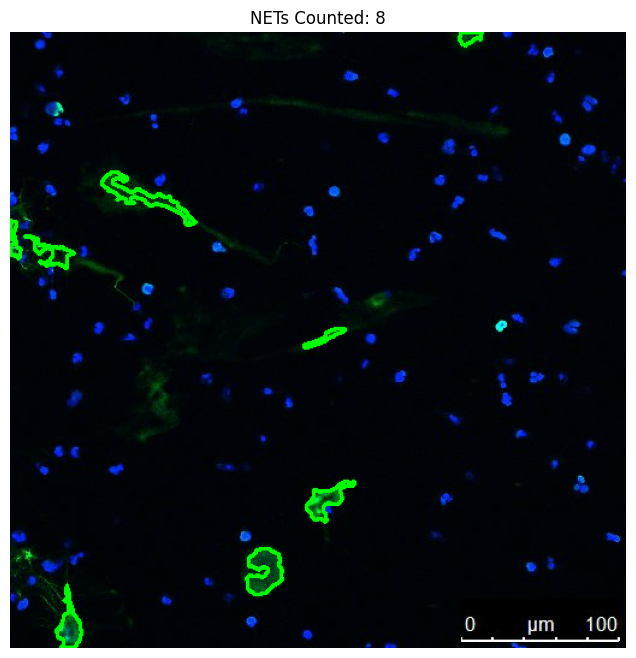

Number of NETs in the image: 8


In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def segment_and_enhance_nets(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the color range for the fluorescent marker
    lower_color = np.array([30, 150, 50])  # Adjust these values based on the color
    upper_color = np.array([85, 255, 255])
    
    # Create a mask for the color
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    # Apply the mask to get the segmented NETs
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Convert the segmented image to grayscale
    gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    
    # Enhance shapes using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    enhanced = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    
    return segmented_image, enhanced

def count_nets(enhanced_image):
    # Find contours in the enhanced image
    contours, _ = cv2.findContours(enhanced_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours by size (example: removing small artifacts)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]  # Adjust the area threshold
    
    # Count the number of filtered contours
    num_nets = len(filtered_contours)
    
    return num_nets, filtered_contours

def process_and_count_nets(image_path):
    image = cv2.imread(image_path)

    if image is not None:
        segmented_image, enhanced_shape = segment_and_enhance_nets(image)
        num_nets, contours = count_nets(enhanced_shape)
        
        # Display the original, segmented, and enhanced images
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 3, 2)
        plt.title('Segmented NETs')
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 3, 3)
        plt.title('Enhanced Shape')
        plt.imshow(enhanced_shape, cmap='gray')
        plt.show()
        
        # Draw contours on the original image
        image_with_contours = image.copy()
        cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
        
        plt.figure(figsize=(8, 8))
        plt.title(f'NETs Counted: {num_nets}')
        plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        print(f"Number of NETs in the image: {num_nets}")
    else:
        print(f"Failed to load image from {image_path}")

# Example usage
image_path = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/unlabeled images/jpegs/Ctr._1h_DFO-Zeitkinetik_2.jpg'
process_and_count_nets(image_path)


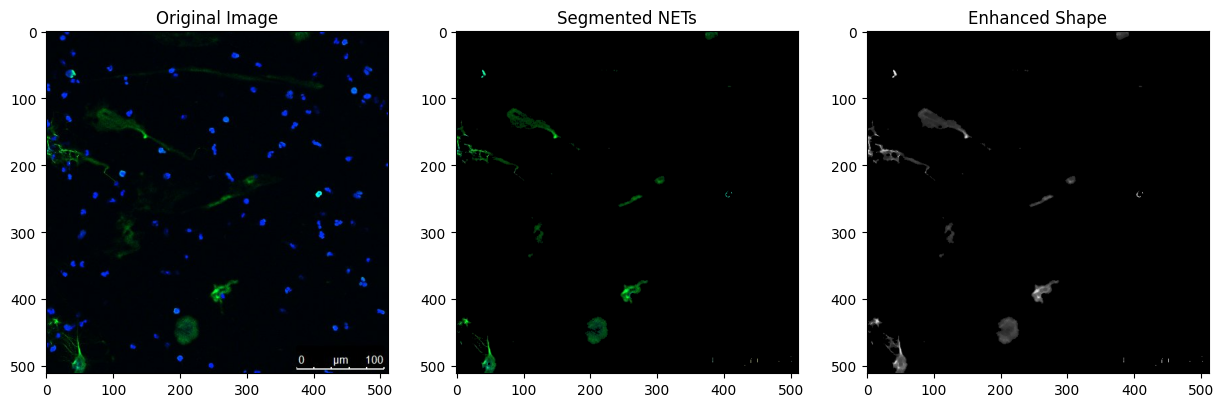

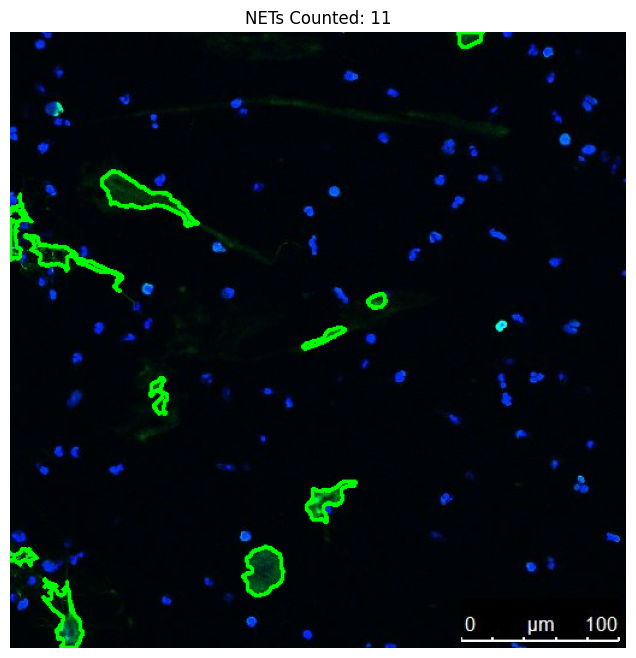

Number of NETs in the image: 11


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def segment_and_enhance_nets(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the color range for the fluorescent marker
    lower_color = np.array([30, 40, 40])  # Adjusted lower threshold to include lighter regions
    upper_color = np.array([85, 255, 255])
    
    # Create a mask for the color
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    # Apply the mask to get the segmented NETs
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Convert the segmented image to grayscale
    gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    
    # Enhance shapes using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    enhanced = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    
    return segmented_image, enhanced

def count_nets(enhanced_image):
    # Find contours in the enhanced image
    contours, _ = cv2.findContours(enhanced_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours by size (example: removing small artifacts)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]  # Adjust the area threshold
    
    # Count the number of filtered contours
    num_nets = len(filtered_contours)
    
    return num_nets, filtered_contours

def process_and_count_nets(image_path):
    image = cv2.imread(image_path)

    if image is not None:
        segmented_image, enhanced_shape = segment_and_enhance_nets(image)
        num_nets, contours = count_nets(enhanced_shape)
        
        # Display the original, segmented, and enhanced images
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 3, 2)
        plt.title('Segmented NETs')
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 3, 3)
        plt.title('Enhanced Shape')
        plt.imshow(enhanced_shape, cmap='gray')
        plt.show()
        
        # Draw contours on the original image
        image_with_contours = image.copy()
        cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
        
        plt.figure(figsize=(8, 8))
        plt.title(f'NETs Counted: {num_nets}')
        plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        print(f"Number of NETs in the image: {num_nets}")
    else:
        print(f"Failed to load image from {image_path}")

# Example usage
image_path = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/unlabeled images/jpegs/Ctr._1h_DFO-Zeitkinetik_2.jpg'
process_and_count_nets(image_path)


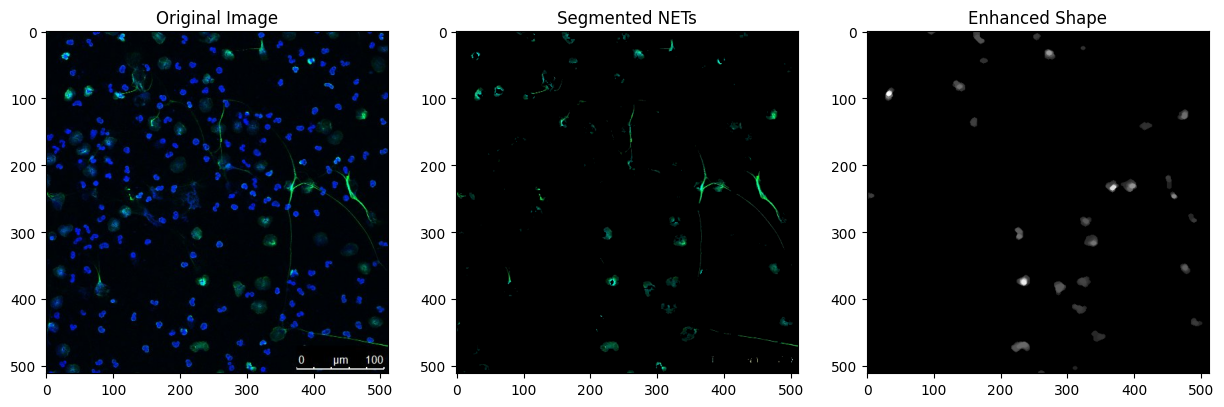

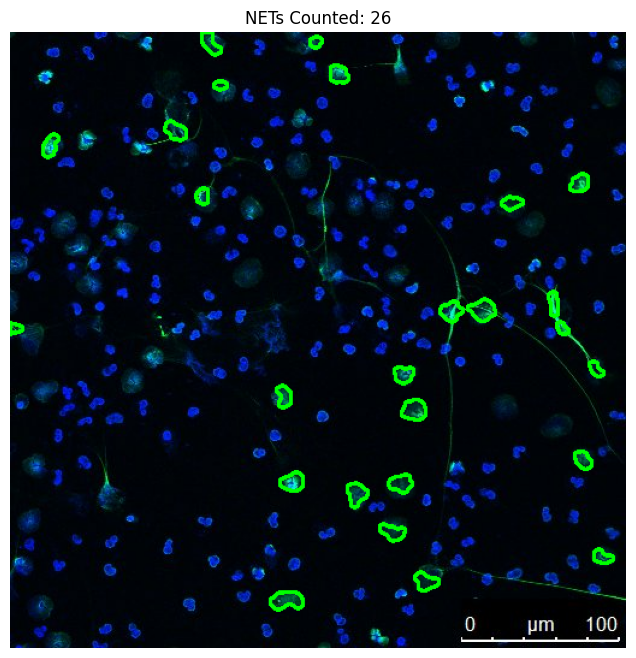

Number of NETs in the image: 26


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def segment_and_enhance_nets(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the color range for the fluorescent marker
    lower_color = np.array([30, 30, 30])  # Adjusted lower threshold to include lighter regions
    upper_color = np.array([90, 255, 255])
    
    # Create a mask for the color
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    # Apply the mask to get the segmented NETs
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Convert the segmented image to grayscale
    gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    
    # Enhance shapes using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    enhanced = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    enhanced = cv2.morphologyEx(enhanced, cv2.MORPH_OPEN, kernel)
    
    return segmented_image, enhanced

def count_nets(enhanced_image):
    # Find contours in the enhanced image
    contours, _ = cv2.findContours(enhanced_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours by size (example: removing small artifacts)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 50]  # Adjust the area threshold
    
    # Count the number of filtered contours
    num_nets = len(filtered_contours)
    
    return num_nets, filtered_contours

def process_and_count_nets(image_path):
    image = cv2.imread(image_path)

    if image is not None:
        segmented_image, enhanced_shape = segment_and_enhance_nets(image)
        num_nets, contours = count_nets(enhanced_shape)
        
        # Display the original, segmented, and enhanced images
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 3, 2)
        plt.title('Segmented NETs')
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 3, 3)
        plt.title('Enhanced Shape')
        plt.imshow(enhanced_shape, cmap='gray')
        plt.show()
        
        # Draw contours on the original image
        image_with_contours = image.copy()
        cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
        
        plt.figure(figsize=(8, 8))
        plt.title(f'NETs Counted: {num_nets}')
        plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        print(f"Number of NETs in the image: {num_nets}")
    else:
        print(f"Failed to load image from {image_path}")

# Example usage
image_path = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/unlabeled images/jpegs/PMA_2h_DFO-Zeitkinetik_4.jpg'
process_and_count_nets(image_path)


In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Directories
input_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/labelled_input'
output_segmented_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/segmented'
output_enhanced_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/enhanced'

# Function to segment and enhance NETs in images
def segment_and_enhance_nets(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_color = np.array([30, 30, 30])
    upper_color = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_color, upper_color)
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    enhanced = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    enhanced = cv2.morphologyEx(enhanced, cv2.MORPH_OPEN, kernel)
    return segmented_image, enhanced

# Process images in the input directory
def process_images(input_dir, output_segmented_dir, output_enhanced_dir):
    for root, _, filenames in os.walk(input_dir):
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_path = os.path.join(root, filename)
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Failed to load image at {image_path}")
                    continue
                segmented_image, enhanced_shape = segment_and_enhance_nets(image)
                enhanced_shape_gray = np.expand_dims(enhanced_shape, axis=-1)
                class_name = os.path.basename(root)
                segmented_image_path = os.path.join(output_segmented_dir, class_name, filename)
                enhanced_image_path = os.path.join(output_enhanced_dir, class_name, filename)
                os.makedirs(os.path.dirname(segmented_image_path), exist_ok=True)
                os.makedirs(os.path.dirname(enhanced_image_path), exist_ok=True)
                cv2.imwrite(segmented_image_path, segmented_image)
                cv2.imwrite(enhanced_image_path, enhanced_shape_gray)
                print(f"Processed and saved images for {filename}")

# Process images
process_images(input_directory, output_segmented_directory, output_enhanced_directory)

# ImageDataGenerator for training and validation sets
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training and validation generators for color and shape images
train_generator_color = datagen.flow_from_directory(
    output_segmented_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

train_generator_shape = datagen.flow_from_directory(
    output_enhanced_directory,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    subset='training'
)

validation_generator_color = datagen.flow_from_directory(
    output_segmented_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

validation_generator_shape = datagen.flow_from_directory(
    output_enhanced_directory,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    subset='validation'
)

# Function to add a prefix to layer names
def add_prefix_to_model(model, prefix):
    for layer in model.layers:
        layer._name = prefix + layer.name

# Define the combined model
def create_combined_model(input_shape):
    base_model_color = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    color_output = GlobalAveragePooling2D()(base_model_color.output)
    shape_input = Input(shape=(input_shape[0], input_shape[1], 1), name='shape_input')
    base_model_shape = VGG16(include_top=False, weights=None, input_tensor=shape_input)
    add_prefix_to_model(base_model_shape, 'shape_')
    shape_output = GlobalAveragePooling2D()(base_model_shape.output)
    combined = Concatenate()([color_output, shape_output])
    x = Dense(128, activation='relu')(combined)
    predictions = Dense(1, activation='linear')(x)
    model = Model(inputs=[base_model_color.input, shape_input], outputs=predictions)
    for layer in base_model_color.layers:
        layer.trainable = False
    for layer in base_model_shape.layers:
        layer.trainable = False
    return model

model = create_combined_model((224, 224, 3))
model.compile(optimizer=Adam(), loss='mean_squared_error', run_eagerly=True)

# Combine generators for training and validation
def combine_generators(gen1, gen2):
    while True:
        X1i = gen1.next()
        X2i = gen2.next()
        yield [X1i[0], X2i[0]], X1i[1]

train_generator = combine_generators(train_generator_color, train_generator_shape)
validation_generator = combine_generators(validation_generator_color, validation_generator_shape)

# Print out some samples from the combined generator for debugging
for i in range(3):
    sample = next(train_generator)
    print(f"Sample {i} from train generator: {[x.shape for x in sample[0]]}, {sample[1].shape}")

# Train the model
try:
    history = model.fit(
        train_generator,
        epochs=10,
        steps_per_epoch=10,
        validation_data=validation_generator,
        validation_steps=10
    )
except Exception as e:
    print(f"Error during model fitting: {e}")

# Save the model
model.save('NET_counting_model_combined.h5')

# Visualize predictions with markers
def visualize_prediction(image_dir, filename, prediction):
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.title(f"Predicted Count: {prediction}")
    plt.axis('off')
    
    # Add contours to highlight recognized shapes
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        if radius > 5:  # Filter small contours
            cv2.circle(image_rgb, center, radius, (0, 255, 0), 2)
    
    plt.imshow(image_rgb)
    plt.show()

# Predict and print counts with visualization
def predict_and_print_counts(model, input_dir_color, input_dir_shape):
    predict_gen_color = datagen.flow_from_directory(
        input_dir_color,
        target_size=(224, 224),
        batch_size=1,
        class_mode=None,
        shuffle=False
    )

    predict_gen_shape = datagen.flow_from_directory(
        input_dir_shape,
        target_size=(224, 224),
        batch_size=1,
        color_mode='grayscale',
        class_mode=None,
        shuffle=False
    )

    def combine_generators_for_prediction(gen1, gen2):
        while True:
            X1i = gen1.next()
            X2i = gen2.next()
            yield [X1i, X2i]

    predictions = model.predict(combine_generators_for_prediction(predict_gen_color, predict_gen_shape), steps=len(predict_gen_color))
    
    true_counts = []  # Collect true counts for confusion matrix
    pred_counts = []  # Collect predicted counts for confusion matrix

    for filename, prediction in zip(predict_gen_color.filenames, predictions):
        print(f"Image: {filename}, Predicted Count: {prediction[0]}")
        true_count = int(filename.split('_')[0])  # Assuming the true count is in the filename
        true_counts.append(true_count)
        pred_counts.append(int(round(prediction[0])))
        visualize_prediction(input_dir_color, filename, prediction[0])

    # Generate confusion matrix
    cm = confusion_matrix(true_counts, pred_counts)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

# Predict and print counts with visualization
predict_and_print_counts(model, output_segmented_directory, output_enhanced_directory)


Processed and saved images for Markers_Counter Window - PMA_2h_DFO-Zeitkinetik_4.jpg
Processed and saved images for Markers_Counter Window - PMA_2h_DFO-Zeitkinetik_5.jpg
Processed and saved images for Markers_Counter Window - Counter Window - DFO_3h_DFO-Zeitkinetik_6.jpg
Processed and saved images for Markers_Counter Window - PMA_3h_DFO-Zeitkinetik_5.jpg
Processed and saved images for Markers_Counter Window - DFO_3h_DFO-Zeitkinetik_5.jpg
Processed and saved images for Markers_Counter Window - Ctr._2h_DFO-Zeitkinetik_4.jpg
Processed and saved images for Markers_Counter Window - DFO_2h_DFO-Zeitkinetik_6.jpg
Processed and saved images for Markers_Counter Window - DFO+PMA_4h_DFO-Zeitkinetik_6.jpg
Processed and saved images for Markers_Counter Window - Ctr._1h_DFO-Zeitkinetik_2.jpg
Processed and saved images for Markers_Counter Window - DFO_2h_DFO-Zeitkinetik_2.jpg
Found 16 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 4 

2024-05-27 15:48:30.740512: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 62s 6s/step - loss: 0.4254 - val_loss: 0.2005
Epoch 2/10
10/10 [==============================] - 96s 10s/step - loss: 0.1716 - val_loss: 0.1648
Epoch 3/10
10/10 [==============================] - 64s 6s/step - loss: 0.1020 - val_loss: 0.2501
Epoch 4/10
10/10 [==============================] - 45s 4s/step - loss: 0.0699 - val_loss: 0.1869
Epoch 5/10
10/10 [==============================] - 63s 6s/step - loss: 0.0566 - val_loss: 0.2706
Epoch 6/10
10/10 [==============================] - 53s 5s/step - loss: 0.0482 - val_loss: 0.2559
Epoch 7/10
10/10 [==============================] - 73s 7s/step - loss: 0.0412 - val_loss: 0.2330
Epoch 8/10
10/10 [==============================] - 65s 6s/step - loss: 0.0319 - val_loss: 0.2360
Epoch 9/10
10/10 [==============================] - 60s 6s/step - loss: 0.0303 - val_loss: 0.2259
Epoch 10/10
10/10 [==============================] - 55s 6s/step - loss: 0.0260 - val_loss: 0.2154
Found 20 images belonging to 

ValueError: Layer "model" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>]

In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Directories
input_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/labelled_input'
output_segmented_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/segmented'
output_enhanced_directory = '/Users/niharikagarg/Documents/Neufische/New/Automated-recognition-of-NETs/data/labeled images/enhanced'

# Function to segment and enhance NETs in images
def segment_and_enhance_nets(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_color = np.array([30, 30, 30])
    upper_color = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_color, upper_color)
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    enhanced = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    enhanced = cv2.morphologyEx(enhanced, cv2.MORPH_OPEN, kernel)
    return segmented_image, enhanced

# Process images in the input directory
def process_images(input_dir, output_segmented_dir, output_enhanced_dir):
    for root, _, filenames in os.walk(input_dir):
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_path = os.path.join(root, filename)
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Failed to load image at {image_path}")
                    continue
                segmented_image, enhanced_shape = segment_and_enhance_nets(image)
                enhanced_shape_gray = np.expand_dims(enhanced_shape, axis=-1)
                class_name = os.path.basename(root)
                segmented_image_path = os.path.join(output_segmented_dir, class_name, filename)
                enhanced_image_path = os.path.join(output_enhanced_dir, class_name, filename)
                os.makedirs(os.path.dirname(segmented_image_path), exist_ok=True)
                os.makedirs(os.path.dirname(enhanced_image_path), exist_ok=True)
                cv2.imwrite(segmented_image_path, segmented_image)
                cv2.imwrite(enhanced_image_path, enhanced_shape_gray)
                print(f"Processed and saved images for {filename}")

# Process images
process_images(input_directory, output_segmented_directory, output_enhanced_directory)

# ImageDataGenerator for training and validation sets
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training and validation generators for color and shape images
train_generator_color = datagen.flow_from_directory(
    output_segmented_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

train_generator_shape = datagen.flow_from_directory(
    output_enhanced_directory,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    subset='training'
)

validation_generator_color = datagen.flow_from_directory(
    output_segmented_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

validation_generator_shape = datagen.flow_from_directory(
    output_enhanced_directory,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    subset='validation'
)

# Function to add a prefix to layer names
def add_prefix_to_model(model, prefix):
    for layer in model.layers:
        layer._name = prefix + layer.name

# Define the combined model
def create_combined_model(input_shape):
    base_model_color = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    color_output = GlobalAveragePooling2D()(base_model_color.output)
    shape_input = Input(shape=(input_shape[0], input_shape[1], 1), name='shape_input')
    base_model_shape = VGG16(include_top=False, weights=None, input_tensor=shape_input)
    add_prefix_to_model(base_model_shape, 'shape_')
    shape_output = GlobalAveragePooling2D()(base_model_shape.output)
    combined = Concatenate()([color_output, shape_output])
    x = Dense(128, activation='relu')(combined)
    predictions = Dense(1, activation='linear')(x)
    model = Model(inputs=[base_model_color.input, shape_input], outputs=predictions)
    for layer in base_model_color.layers:
        layer.trainable = False
    for layer in base_model_shape.layers:
        layer.trainable = False
    return model

model = create_combined_model((224, 224, 3))
model.compile(optimizer=Adam(), loss='mean_squared_error', run_eagerly=True)

# Combine generators for training and validation
def combine_generators(gen1, gen2):
    while True:
        X1i = gen1.next()
        X2i = gen2.next()
        yield [X1i[0], X2i[0]], X1i[1]

train_generator = combine_generators(train_generator_color, train_generator_shape)
validation_generator = combine_generators(validation_generator_color, validation_generator_shape)

# Print out some samples from the combined generator for debugging
for i in range(3):
    sample = next(train_generator)
    print(f"Sample {i} from train generator: {[x.shape for x in sample[0]]}, {sample[1].shape}")

# Train the model
try:
    history = model.fit(
        train_generator,
        epochs=10,
        steps_per_epoch=10,
        validation_data=validation_generator,
        validation_steps=10
    )
except Exception as e:
    print(f"Error during model fitting: {e}")

# Save the model
model.save('NET_counting_model_combined.h5')

# Visualize predictions with markers
def visualize_prediction(image_dir, filename, prediction):
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.title(f"Predicted Count: {prediction}")
    plt.axis('off')
    
    # Add contours to highlight recognized shapes
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        if radius > 5:  # Filter small contours
            cv2.circle(image_rgb, center, radius, (0, 255, 0), 2)
    
    plt.imshow(image_rgb)
    plt.show()

# Predict and print counts with visualization
def predict_and_print_counts(model, input_dir_color, input_dir_shape):
    predict_gen_color = datagen.flow_from_directory(
        input_dir_color,
        target_size=(224, 224),
        batch_size=1,
        class_mode=None,
        shuffle=False
    )

    predict_gen_shape = datagen.flow_from_directory(
        input_dir_shape,
        target_size=(224, 224),
        batch_size=1,
        color_mode='grayscale',
        class_mode=None,
        shuffle=False
    )

    def combine_generators_for_prediction(gen1, gen2):
        while True:
            X1i = gen1.next()
            X2i = gen2.next()
            yield [X1i, X2i]

    predictions = model.predict(combine_generators_for_prediction(predict_gen_color, predict_gen_shape), steps=len(predict_gen_color))
    
    true_counts = []  # Collect true counts for confusion matrix
    pred_counts = []  # Collect predicted counts for confusion matrix

    for filename, prediction in zip(predict_gen_color.filenames, predictions):
        print(f"Image: {filename}, Predicted Count: {prediction[0]}")
        true_count = int(filename.split('_')[0])  # Assuming the true count is in the filename
        true_counts.append(true_count)
        pred_counts.append(int(round(prediction[0])))
        visualize_prediction(input_dir_color, filename, prediction[0])

    # Generate confusion matrix
    cm = confusion_matrix(true_counts, pred_counts)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

# Predict and print counts with visualization
predict_and_print_counts(model, output_segmented_directory, output_enhanced_directory)


Processed and saved images for Markers_Counter Window - PMA_2h_DFO-Zeitkinetik_4.jpg
Processed and saved images for Markers_Counter Window - PMA_2h_DFO-Zeitkinetik_5.jpg
Processed and saved images for Markers_Counter Window - Counter Window - DFO_3h_DFO-Zeitkinetik_6.jpg
Processed and saved images for Markers_Counter Window - PMA_3h_DFO-Zeitkinetik_5.jpg
Processed and saved images for Markers_Counter Window - DFO_3h_DFO-Zeitkinetik_5.jpg
Processed and saved images for Markers_Counter Window - Ctr._2h_DFO-Zeitkinetik_4.jpg
Processed and saved images for Markers_Counter Window - DFO_2h_DFO-Zeitkinetik_6.jpg
Processed and saved images for Markers_Counter Window - DFO+PMA_4h_DFO-Zeitkinetik_6.jpg
Processed and saved images for Markers_Counter Window - Ctr._1h_DFO-Zeitkinetik_2.jpg
Processed and saved images for Markers_Counter Window - DFO_2h_DFO-Zeitkinetik_2.jpg
Found 16 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 4 

2024-05-28 10:50:31.800801: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 48s 5s/step - loss: 0.2936 - val_loss: 0.2751
Epoch 2/10
10/10 [==============================] - 64s 5s/step - loss: 0.1310 - val_loss: 0.1618
Epoch 3/10
10/10 [==============================] - 51s 4s/step - loss: 0.0757 - val_loss: 0.3299
Epoch 4/10
10/10 [==============================] - 49s 5s/step - loss: 0.0596 - val_loss: 0.2812
Epoch 5/10
10/10 [==============================] - 59s 6s/step - loss: 0.0484 - val_loss: 0.2486
Epoch 6/10
10/10 [==============================] - 54s 5s/step - loss: 0.0403 - val_loss: 0.2740
Epoch 7/10
10/10 [==============================] - 56s 5s/step - loss: 0.0299 - val_loss: 0.2666
Epoch 8/10
10/10 [==============================] - 51s 5s/step - loss: 0.0281 - val_loss: 0.2427
Epoch 9/10
10/10 [==============================] - 62s 6s/step - loss: 0.0235 - val_loss: 0.2267
Epoch 10/10
 4/10 [===========>..................] - ETA: 46s - loss: 0.0155  